In [27]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

## Defining the grid


In [28]:
# Defining the grid
x = np.linspace(-5, 5, 23)
y = np.linspace(-5, 5, 23)
X, Y = np.meshgrid(x, y)



## Creating charges

In [29]:
# Creating charges
q1 = 4          # Charge magnitude 1
q2 = -3        # Charge magnitude 2
x1, y1 = -2, 0  # Charge 1 position
x2, y2 = 2, 0   # Charge 2 position




## Calculating the electric field for every point on the grid 

In [30]:
# Calculating the electric field at each point on the grid
def calculate_field(q1, q2, x1, y1, x2, y2):
    k = 9 * 10**9  # Coulomb's constant
    r1 = np.sqrt((X - x1)**2 + (Y - y1)**2)  # Distance from charge 1
    r2 = np.sqrt((X - x2)**2 + (Y - y2)**2)  # Distance from charge 2
    Ex1 = k * q1 * (X - x1) / r1**3    # Electric field component from charge 1 along x-axis
    Ey1 = k * q1 * (Y - y1) / r1**3    # Electric field component from charge 1 along y-axis
    Ex2 = k * q2 * (X - x2) / r2**3    # Electric field component from charge 2 along x-axis
    Ey2 = k * q2 * (Y - y2) / r2**3    # Electric field component from charge 2 along y-axis
    Ex = Ex1 + Ex2                     # Total electric field component along x-axis
    Ey = Ey1 + Ey2                     # Total electric field component along y-axis
    return Ex, Ey



In [31]:
# Create interactive sliders and input fields
q1_slider = widgets.FloatSlider(value=q1, min=-5, max=5, step=0.1, description='Charge 1 (q1):')
q2_slider = widgets.FloatSlider(value=q2, min=-5, max=5, step=0.1, description='Charge 2 (q2):')
x1_input = widgets.FloatText(value=x1, description='X1 position:')
y1_input = widgets.FloatText(value=y1, description='Y1 position:')
x2_input = widgets.FloatText(value=x2, description='X2 position:')
y2_input = widgets.FloatText(value=y2, description='Y2 position:')

# Update the plot when sliders or input fields change
def update_plot(change):
    q1 = q1_slider.value
    q2 = q2_slider.value
    x1 = x1_input.value
    y1 = y1_input.value
    x2 = x2_input.value
    y2 = y2_input.value
    
    Ex, Ey = calculate_field(q1, q2, x1, y1, x2, y2)
    Ex_norm = Ex / np.sqrt(Ex**2 + Ey**2)
    Ey_norm = Ey / np.sqrt(Ex**2 + Ey**2)
    
    plt.quiver(X, Y, Ex_norm, Ey_norm, scale=20)
    plt.title('Electric Field Lines')
    plt.draw()

# Register the update function with slider and input field events
q1_slider.observe(update_plot, 'value')
q2_slider.observe(update_plot, 'value')
x1_input.observe(update_plot, 'value')
y1_input.observe(update_plot, 'value')
x2_input.observe(update_plot, 'value')
y2_input.observe(update_plot, 'value')


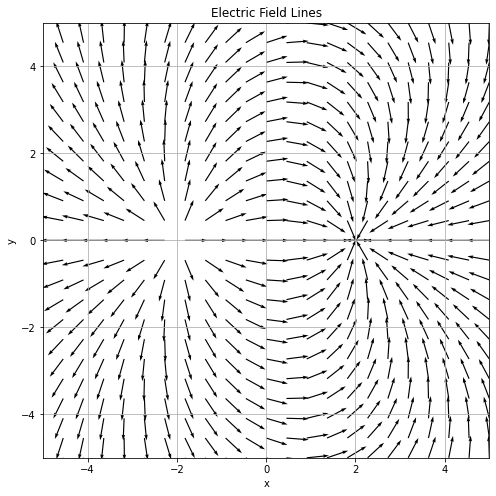

In [32]:
# Create a layout for sliders and input fields
layout = widgets.Layout(display='flex', flex_flow='row', justify_content='space-between', width='400px')

# Display the sliders and input fields
display(widgets.VBox([q1_slider, q2_slider, x1_input, y1_input, x2_input, y2_input], layout=layout))

# Create the initial plot
plt.figure(figsize=(8, 8))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electric Field Lines')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.grid(True)

# Call update_plot() to initialize the plot
update_plot(None)

# Show the plot
plt.show()